In [1]:
import pandas as pd
import seaborn as sns
from collections import defaultdict
import seaborn as sns

In [2]:
years = 20
rate = 0.05  # mean annual rate, e.g. VT ETF
dip_fee = 0  # DIP annual fee
contrib_emp = 20_400  # employee contributions, max 48000
contrib_comp = 0  # employer contributions, max 50000
contrib = contrib_emp + contrib_comp
tax_rate = 0.15  # income tax rate
socsec_rate = 0.15  # social+healthcare tax rate (employee)
dip_tax_saving = contrib_emp * tax_rate + contrib_comp * (tax_rate + socsec_rate)
dps_state_contrib = 340 * 12
contrib_for_max_state_support = 1700
dps_tax_saving = (contrib_emp - 12 * contrib_for_max_state_support) * tax_rate + contrib_comp * (tax_rate + socsec_rate)
etf_ter = 0.001

In [3]:
res = defaultdict(list)
init = 500_000
dip = init - 50_000
fees = 0
etf_dip_tax = 0
fees_etf_dip_tax = 0
etf_dps_tax = 0
fees_etf_dps_tax = 0
etf = init - 50_000  # benchmark
etf_fees = 0
dps = init # doplnkove penzijni sporeni, benchmark
dps_fees = 0

for year in range(1, years + 1):
    dip = (dip + contrib) * (1 + rate)
    fee = dip * (dip_fee + etf_ter)
    dip -= fee
    fees += fee
    res["dip"].append(dip)
    res["fees"].append(fees)

    etf_dip_tax = (etf_dip_tax + dip_tax_saving) * (1 + rate)
    fee = etf_dip_tax * etf_ter
    etf_dip_tax -= fee
    fees_etf_dip_tax += fee
    res["etf_dip_tax"].append(etf_dip_tax)
    res["fees_etf_dip_tax"].append(fees_etf_dip_tax)
    
    etf = (etf + contrib) * (1 + rate)
    fee = etf * etf_ter
    etf_fees += fee
    etf -= fee
    res["etf"].append(etf)
    res["etf_fees"].append(etf_fees)
    
    dps_gain = (dps + contrib + dps_state_contrib) * rate
    dps += dps_gain + contrib + dps_state_contrib
    fee = dps * 0.0075 + dps_gain * 0.015
    dps -= fee
    dps_fees += fee
    res["dps"].append(dps)
    res["dps_fees"].append(dps_fees)

    etf_dps_tax = (etf_dps_tax + dps_tax_saving) * (1 + rate)
    fee = etf_dps_tax * etf_ter
    etf_dps_tax -= fee
    fees_etf_dps_tax += fee
    res["etf_dps_tax"].append(etf_dps_tax)
    res["fees_etf_dps_tax"].append(fees_etf_dps_tax)

res = pd.DataFrame(res)
res["dps_reinvest"] = res.dps + res.etf_dps_tax
res["dps_reinvest_fees"] = res.dps_fees + res.fees_etf_dps_tax
res["dip_reinvest"] = res.dip + res.etf_dip_tax
res["dip_reinvest_fees"] = res.fees + res.fees_etf_dip_tax
res

,dip,fees,etf_dip_tax,fees_etf_dip_tax,etf,etf_fees,dps,dps_fees,etf_dps_tax,fees_etf_dps_tax,dps_reinvest,dps_reinvest_fees,dip_reinvest,dip_reinvest_fees
0,4.934261e+05,493.920000,3209.787000,3.213000,4.934261e+05,493.920000,5.461804e+05,4523.640000,0.0,0.0,5.461804e+05,4523.640000,4.966359e+05,497.133000
1,5.389779e+05,1033.437384,6576.693074,9.796276,5.389779e+05,1033.437384,5.942714e+05,9445.585605,0.0,0.0,5.942714e+05,9445.585605,5.455546e+05,1043.233660
2,5.867594e+05,1620.784144,10108.409200,19.914804,5.867594e+05,1620.784144,6.443523e+05,14782.316709,0.0,0.0,6.443523e+05,14782.316709,5.968678e+05,1640.698948
3,6.368799e+05,2258.301528,13813.002830,33.741634,6.368799e+05,2258.301528,6.965052e+05,20550.995063,0.0,0.0,6.965052e+05,20550.995063,6.506929e+05,2292.043162
4,6.894537e+05,2948.445388,17698.936318,51.458287,6.894537e+05,2948.445388,7.508160e+05,26769.492484,0.0,0.0,7.508160e+05,26769.492484,7.071527e+05,2999.903674
5,7.446011e+05,3693.791789,21775.086251,73.255170,7.446011e+05,3693.791789,8.073738e+05,33456.420236,0.0,0.0,8.073738e+05,33456.420236,7.663761e+05,3767.046959
6,8.024479e+05,4497.042897,26050.763723,99.332010,8.024479e+05,4497.042897,8.662718e+05,40631.159623,0.0,0.0,8.662718e+05,40631.159623,8.284986e+05,4596.374908
7,8.631263e+05,5361.033147,30535.735607,129.898312,8.631263e+05,5361.033147,9.276067e+05,48313.893852,0.0,0.0,9.276067e+05,48313.893852,8.936620e+05,5490.931460
8,9.267749e+05,6288.735720,35240.246865,165.173835,9.267749e+05,6288.735720,9.914792e+05,56525.641210,0.0,0.0,9.914792e+05,56525.641210,9.620151e+05,6453.909554
9,9.935391e+05,7283.269333,40175.043950,205.389094,9.935391e+05,7283.269333,1.057995e+06,65288.289615,0.0,0.0,1.057995e+06,65288.289615,1.033714e+06,7488.658427


<Axes: >

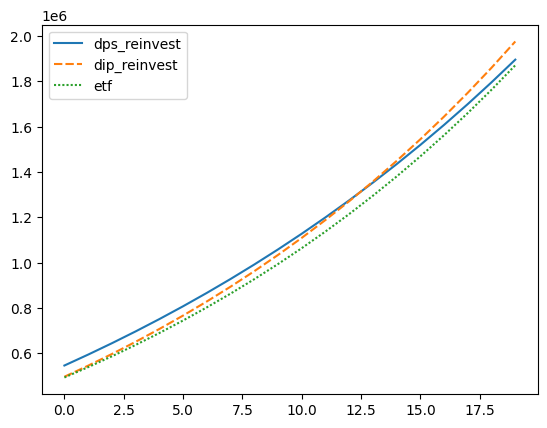

In [4]:
sns.lineplot(res[["dps_reinvest", "dip_reinvest", "etf"]])

<Axes: >

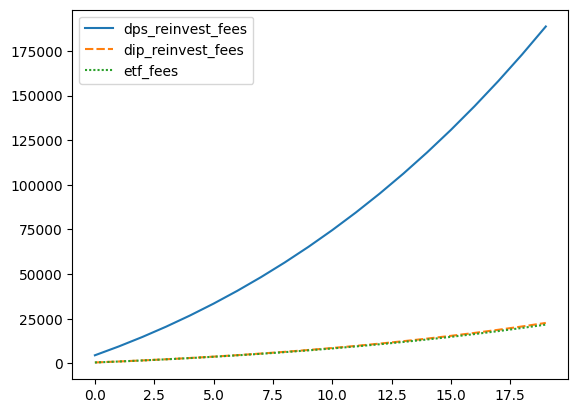

In [5]:
sns.lineplot(res[["dps_reinvest_fees", "dip_reinvest_fees", "etf_fees"]])

In [6]:
pd.options.display.max_colwidth = 200
res[["etf", "dps_reinvest", "dip_reinvest"]].tail(1)

,etf,dps_reinvest,dip_reinvest
19,1.870093e+06,1.894948e+06,1.975058e+06


In [7]:
res[["etf_fees", "dps_reinvest_fees", "dip_reinvest_fees"]].tail(1)

,etf_fees,dps_reinvest_fees,dip_reinvest_fees
19,21709.860558,188728.183703,22648.628878
